In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
# Step 1: Load Dataset
# Assumes dataset has two folders: "Drowsy" and "NonDrowsy"
data_dir = "./dataset"

In [6]:
image_size = (224, 224)
# Use ImageDataGenerator for memory-efficient data loading
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Split for training and validation
    preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 33435 images belonging to 2 classes.
Found 8358 images belonging to 2 classes.


In [7]:
# Step 2: Build Model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

I0000 00:00:1733595111.443127    1812 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6717 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Step 3: Train Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

/home/tyson/development/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1733595119.986014    2306 service.cc:148] XLA service 0x7f96400415f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733595119.986363    2306 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2024-12-08 01:12:00.123333: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733595120.876471    2306 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1/1045 ━━━━━━━━━━━━━━━━━━━━ 3:16:10 11s/step - accuracy: 0.6250 - loss: 0.8687

I0000 00:00:1733595126.613189    2306 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1045/1045 ━━━━━━━━━━━━━━━━━━━━ 166s 148ms/step - accuracy: 0.5280 - loss: 0.7036 - val_accuracy: 0.5347 - val_loss: 0.6907
Epoch 2/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 127s 121ms/step - accuracy: 0.5385 - loss: 0.6903 - val_accuracy: 0.5347 - val_loss: 0.6908
Epoch 3/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 129s 123ms/step - accuracy: 0.5356 - loss: 0.6907 - val_accuracy: 0.5347 - val_loss: 0.6908
Epoch 4/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 121s 115ms/step - accuracy: 0.5337 - loss: 0.6910 - val_accuracy: 0.5347 - val_loss: 0.6907
Epoch 5/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 123s 118ms/step - accuracy: 0.5355 - loss: 0.6907 - val_accuracy: 0.5347 - val_loss: 0.6907
Epoch 6/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 119s 114ms/step - accuracy: 0.5368 - loss: 0.6905 - val_accuracy: 0.5347 - val_loss: 0.6908
Epoch 7/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 115s 110ms/step - accuracy: 0.5387 - loss: 0.6902 - val_accuracy: 0.5347 - val_loss: 0.6907
Epoch 8/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 115s 110ms/step - accuracy: 0.5

In [9]:
# Step 4: Evaluate Model
eval_loss, eval_acc = model.evaluate(validation_generator)

# Print Training and Validation Metrics
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

print(f"Training Accuracy: {train_acc[-1]:.2f}")
print(f"Training Loss: {train_loss[-1]:.2f}")
print(f"Validation Accuracy: {val_acc[-1]:.2f}")
print(f"Validation Loss: {val_loss[-1]:.2f}")
print(f"Test Accuracy: {eval_acc:.2f}")
print(f"Test Loss: {eval_loss:.2f}")


262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 90ms/step - accuracy: 0.5336 - loss: 0.6909
Training Accuracy: 0.53
Training Loss: 0.69
Validation Accuracy: 0.53
Validation Loss: 0.69
Test Accuracy: 0.53
Test Loss: 0.69


In [10]:
# Plot Training Performance
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

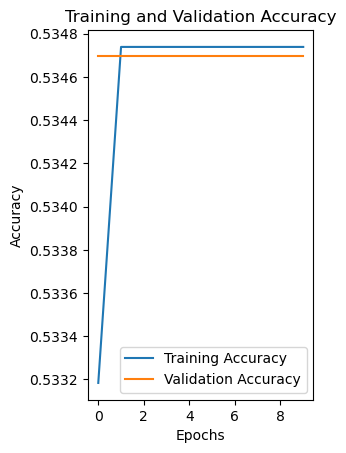

In [11]:
# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

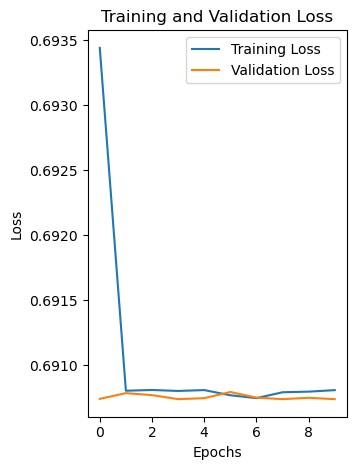

In [12]:
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# Step 6: Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpsiuhdd6a/assets


INFO:tensorflow:Assets written to: /tmp/tmpsiuhdd6a/assets


Saved artifact at '/tmp/tmpsiuhdd6a'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  140285806624080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140285805799728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140285805800784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140285805799200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140285805799376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140285805791888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140285805795280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140285805796336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140285805794048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140285805795104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1402858056

W0000 00:00:1733596427.941219    1812 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1733596427.941282    1812 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2024-12-08 01:33:47.941922: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpsiuhdd6a
2024-12-08 01:33:47.956467: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-12-08 01:33:47.956503: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpsiuhdd6a
I0000 00:00:1733596428.077489    1812 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2024-12-08 01:33:48.106198: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-12-08 01:33:48.928700: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpsiuhdd6a
2024-12-08 01:33:49.117518: I tensorflow/cc/saved_model/loader.cc:466] SavedModel 

In [14]:
# Save the TFLite model
tflite_model_path = "drowsiness_detection.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print(f"TFLite model saved at {tflite_model_path}")

TFLite model saved at drowsiness_detection.tflite
